# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [ ]:
#all files are named state# with some number indicating the data order. The files contain the names of the states as well as population data.

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

states_glob = glob.glob("state*.csv") #creating a glob object of the states files

states_info = [] #creating an empty list to store the census data
for state in states_glob: #looping through each file and appending to empty list
    data = pd.read_csv(state)
    states_info.append(data)

us_census = pd.concat(states_info) #concat'ing the data into one dataframe

print(us_census.head()) #printing the first 5 rows to inspect the data.

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [175]:
print(us_census.columns) #printing the column names of the dataframe
print(us_census.dtypes) #checking the datatypes

#we would prefer the percentages of different ethnicities to be floats, as well as the income column. It would be best to split the gender column into the different gender values.

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [ ]:
#To convert the pop numbers we need to drop the % and convert to a float
#To convert the income column we'd need to drop the $ symbol and convert
#To convert the gender pop column, we'd need to split the data on the _ and assign only the digits to the column values.

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [177]:
us_census["Income"] = us_census["Income"].str.replace("[\$,]", "", regex = True) #replacing the $ and , with empty space
print(us_census.head()) #checking the data is converted

us_census["Income"] = pd.to_numeric(us_census["Income"]) #converting to a numeric value
print(us_census.dtypes)

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific     Income            GenderPop  
0   0.03%  43296.36     2341093M_2489527F  
1   1.06%  70354.74       384160M_349215F  
2   0.17%  54207.82     3299088M_3342840F  
3   0.15%  41935.63     1451913M_1506295F  
4   0.35%  67264.78   19087135M_19334329F  
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Ben\AppData\Local\Temp\ipykernel_8144\970903697.py:1: SyntaxWarning: invalid escape sequence '\$'
  us_census["Income"] = us_census["Income"].str.replace("[\$,]", "", regex = True) #replacing the $ and , with empty space


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [179]:
gender_split = us_census["GenderPop"].str.split("_") #splitting on the _ for the genderpop column
print(gender_split.head()) #checking data

us_census["Men"] = gender_split.str.get(0) #assigning the 0'th index to men
us_census["Women"] = gender_split.str.get(1) #assigning the 1st index to women

print(us_census.head()) #checking new data

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: GenderPop, dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop        Men      Women  
0   0.03%  43296.36    2341093M_2489527F   2341093M   2489527F  
1   1.06%  70354.74      384160M_349215F    384160M    349215F  
2   0.17%  54207.82    3299088M_3342840F   3299088M   3342840F  
3   0.15%  41935.63    1451913M_1506295F   1451913M   1506295F  
4   0.35%  67264.78  19

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [181]:
us_census["Men"] = us_census["Men"].str[:-2] #dropping the M at the end
print(us_census.head())

us_census["Women"] = us_census["Women"].str[:-2] #dropping the F at the end

print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop      Men      Women  
0   0.03%  43296.36    2341093M_2489527F   234109   2489527F  
1   1.06%  70354.74      384160M_349215F    38416    349215F  
2   0.17%  54207.82    3299088M_3342840F   329908   3342840F  
3   0.15%  41935.63    1451913M_1506295F   145191   1506295F  
4   0.35%  67264.78  19087135M_19334329F  1908713  19334329F  
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25% 

In [183]:
us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

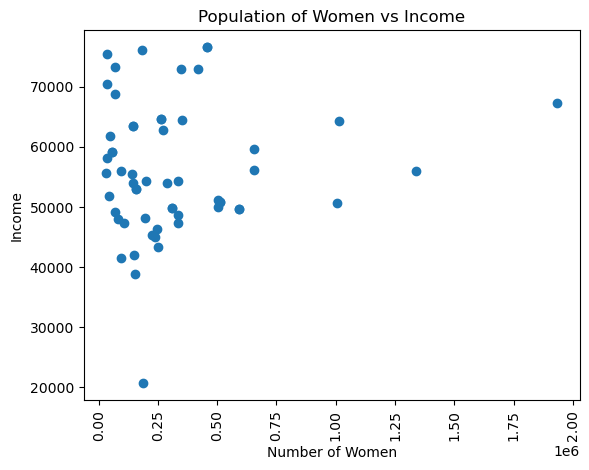

<Figure size 640x480 with 0 Axes>

In [185]:
us_census = us_census[["State", "TotalPop", "Hispanic", "White", "Black", "Native", "Asian", "Pacific", "Income", "Men", "Women"]]

plt.scatter(us_census["Women"], us_census["Income"])
plt.title("Population of Women vs Income")
plt.xlabel("Number of Women")
plt.ylabel("Income")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [187]:
# print(us_census["Women"])

us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"]) #replacing NaN's with the difference of totalpop and men value
# print(us_census["Women"])

us_census["Women"] = us_census["Women"].astype("int64") #converting datatype of women column from float to int as this makes more sense.
# print(us_census["Women"])

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [189]:
census_duplicated = us_census.duplicated() #checking for duplicate rows
print(census_duplicated.value_counts())

False    51
True      9
Name: count, dtype: int64


11. Drop those duplicates using the `.drop_duplicates()` function.

In [191]:
us_census = us_census.drop_duplicates() #dropping duplicates

census_duplicated = us_census.duplicated() #checking for duplicate rows
print(census_duplicated.value_counts())

False    51
Name: count, dtype: int64


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

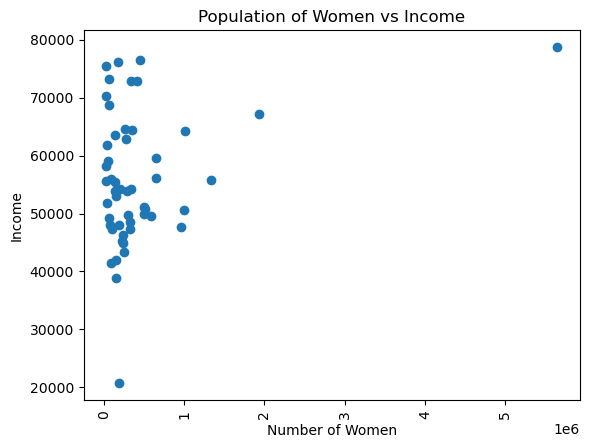

<Figure size 640x480 with 0 Axes>

In [193]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.title("Population of Women vs Income")
plt.xlabel("Number of Women")
plt.ylabel("Income")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [195]:
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

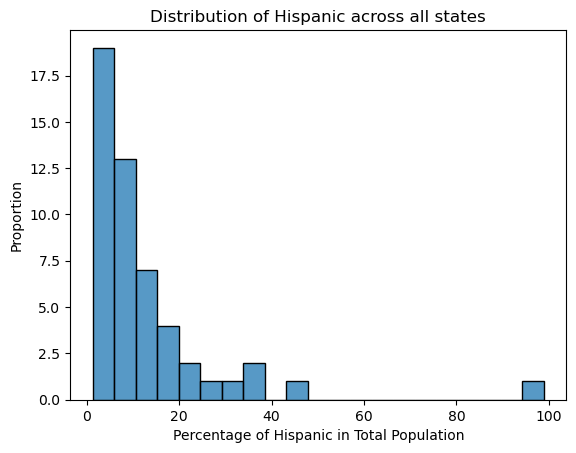

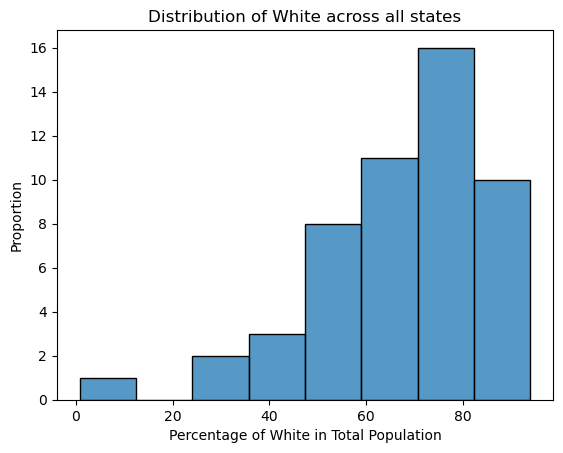

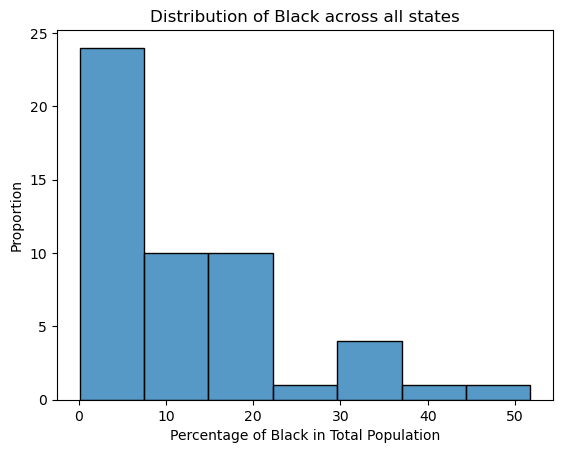

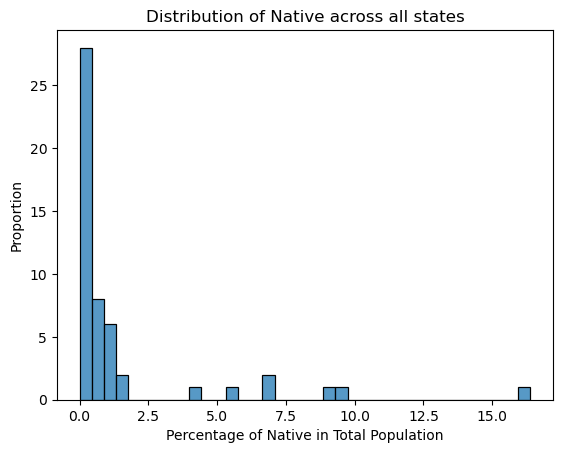

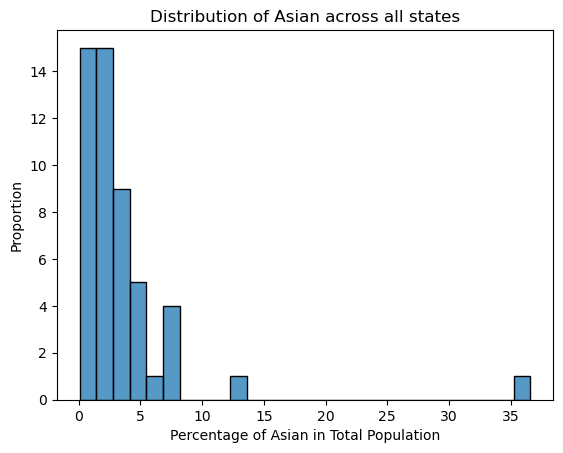

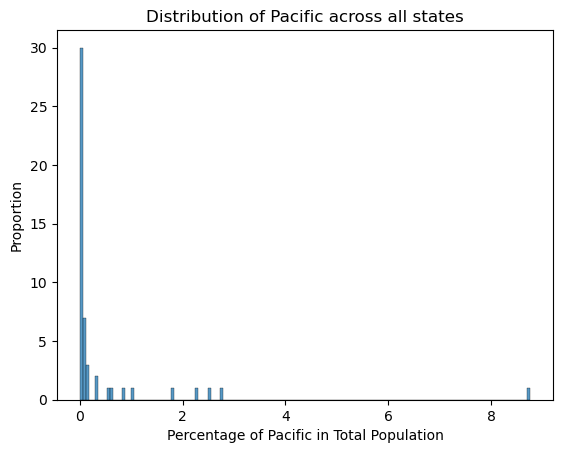

<Figure size 640x480 with 0 Axes>

In [235]:
races = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"] #list of races in the dataframe

# for race in races: #loop to drop the % in the race percentage and convert to numeric datatype
#     us_census[race] = us_census[race].str.replace("[\%,]", "", regex = True)
#     us_census[race] = pd.to_numeric(us_census[race])

# print(us_census.head(10))

us_census["Pacific"] = us_census["Pacific"].fillna(100 - us_census[["Hispanic", "White", "Black", "Native", "Asian"]].sum(axis=1)) 
#replace nan values with the 100% - sum of other race %

# print(us_census)

import seaborn as sns

for race in races:
    sns.histplot(data = us_census, x=race)
    plt.title(f"Distribution of {race} across all states")
    plt.xlabel(f"Percentage of {race} in Total Population")
    plt.ylabel("Proportion")
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.